## Семинар 2

# Тема: Построение 3D-графиков. Метод градиентного спуска

Импортируем необходимые библиотеки:

In [7]:
import numpy as np
import pandas as pnd
import matplotlib.pyplot as plt

C:\Users\Админ\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Пример построения 3D-графика функции $z = x^2 + y^2$ на квадрате $[-10;10]\times[-10;10]$.

In [2]:
def z(x, y):
    return x**2 + y**2

In [3]:
N = 100
x = np.linspace(-10,10,N)
y = np.linspace(-10,10,N)
x_grid, y_grid = np.meshgrid(x, y)

In [4]:
y_grid

array([[-10.       , -10.       , -10.       , ..., -10.       ,
        -10.       , -10.       ],
       [ -9.7979798,  -9.7979798,  -9.7979798, ...,  -9.7979798,
         -9.7979798,  -9.7979798],
       [ -9.5959596,  -9.5959596,  -9.5959596, ...,  -9.5959596,
         -9.5959596,  -9.5959596],
       ...,
       [  9.5959596,   9.5959596,   9.5959596, ...,   9.5959596,
          9.5959596,   9.5959596],
       [  9.7979798,   9.7979798,   9.7979798, ...,   9.7979798,
          9.7979798,   9.7979798],
       [ 10.       ,  10.       ,  10.       , ...,  10.       ,
         10.       ,  10.       ]])

In [5]:
z_grid = z(x_grid, y_grid)

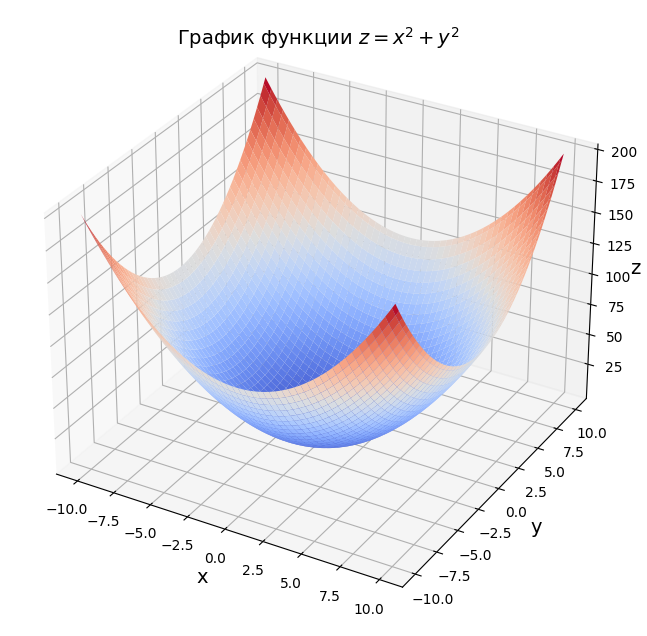

In [6]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.set_title('График функции $z = x^2 + y^2$', fontsize=14, y = 1.01 )
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### Метод градиентного спуска
Функция $y = f(x_1, x_2,\dots , x_n)$ - непрерывно-дифференцируемая и выпукла.

Требуется найти некоторую точку $(x^{*}_1, x^{*}_2,\dots , x^{*}_n)$ локального минимума этой функции.

*Для применения метода градиентного спуска нужно выполнить следующие действия*:

1) Вычислить градиент функции:
$\overrightarrow {grad f} = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} , \dots,  \frac{\partial f}{\partial x_n})^T$

2) Задать начальное значение $(x^{0}_1, x^{0}_2,\dots , x^{0}_n)^T$


3) Задать скорость обучения (learning rate) $\alpha = \alpha_0$

4) Задать количество шагов градиентного спуска $k = k_0$

5) На каждом шаге менять все переменные, от которых зависит функция, по формуле:

$$\vec{x}^{j+1} = \vec{x}^{j} - \alpha \cdot \overrightarrow{grad f} (x_{1}^{j},x_{2}^{j},\dots ,x_{n}^{j}), j = 0, 1, ..., k_0 -1$$


### Пример нахождения точки минимума функции $f(w) =w ^ 2$ методом градиентного спуска.
Считаем, что точка минимума найдена, если значение производной в ней равно нулю с точностью 4-знака после запятой. Метод градиентного спуска может расходиться. Будем считать, что он расходится, если числа становятся велики (больше 1000000).

In [7]:
def derivative_f(w):
    return 2 * w

In [8]:
def Gradient_Discent(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    for _ in range(max_iter):
        w = w - learning_rate * derivative_f(w)
        print(w, derivative_f(w))
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w

In [9]:
w_min = Gradient_Discent(derivative_f, w_start=np.random.random(1))

[0.19901576] [0.39803152]
[0.15921261] [0.31842522]
[0.12737009] [0.25474018]
[0.10189607] [0.20379214]
[0.08151686] [0.16303371]
[0.06521349] [0.13042697]
[0.05217079] [0.10434158]
[0.04173663] [0.08347326]
[0.0333893] [0.06677861]
[0.02671144] [0.05342289]
[0.02136915] [0.04273831]
[0.01709532] [0.03419065]
[0.01367626] [0.02735252]
[0.01094101] [0.02188201]
[0.00875281] [0.01750561]
[0.00700224] [0.01400449]
[0.0056018] [0.01120359]
[0.00448144] [0.00896287]
[0.00358515] [0.0071703]
[0.00286812] [0.00573624]
[0.0022945] [0.00458899]
[0.0018356] [0.00367119]
[0.00146848] [0.00293695]
[0.00117478] [0.00234956]
[0.00093983] [0.00187965]
[0.00075186] [0.00150372]
[0.00060149] [0.00120298]
[0.00048119] [0.00096238]
[0.00038495] [0.0007699]
[0.00030796] [0.00061592]
[0.00024637] [0.00049274]
[0.0001971] [0.00039419]
[0.00015768] [0.00031535]
[0.00012614] [0.00025228]
[0.00010091] [0.00020183]
[8.07303842e-05] [0.00016146]
[6.45843074e-05] [0.00012917]
[5.16674459e-05] [0.00010333]
[4.1333

In [10]:
np.round(w_min)

array([0.])

# Задания для самостоятельного выполнения

### 1. Задайте квадратную область на плоскости $[-5;5]\times[0;10]$ cеткой точек $10\times 10$. Визуализируйте эти точки на диаграмме рассеивания.
Указание: Используйте метод [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) библиотеки numpy.

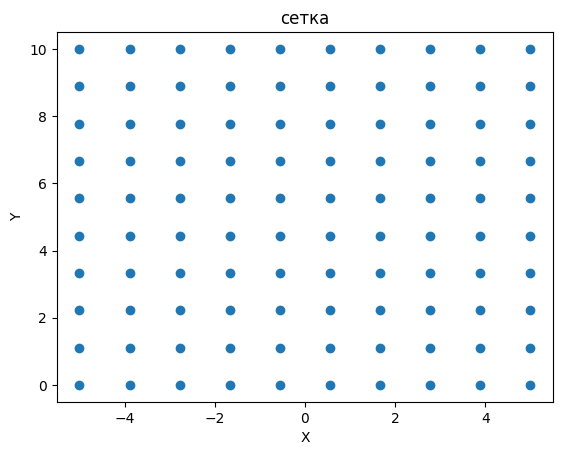

In [11]:
x = np.linspace(-5, 5, 10)
y = np.linspace(0, 10, 10)
x_grid, y_grid = np.meshgrid(x, y)
plt.scatter(x_grid, y_grid)
"""
plt.gca().set_aspect('equal', adjustable="box")
"""
plt.title("сетка")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### 2. Запрограммируйте функцию $z = x^2 + (y - 5)^2 + 4$. Вычислите значения этой функции в точках, построенной сетки.

In [12]:
def z(x, y):
  return x**2+(y-5)**2+4

z_grid = z(x_grid, y_grid)
z_grid

array([[54.        , 44.12345679, 36.71604938, 31.77777778, 29.30864198,
        29.30864198, 31.77777778, 36.71604938, 44.12345679, 54.        ],
       [44.12345679, 34.24691358, 26.83950617, 21.90123457, 19.43209877,
        19.43209877, 21.90123457, 26.83950617, 34.24691358, 44.12345679],
       [36.71604938, 26.83950617, 19.43209877, 14.49382716, 12.02469136,
        12.02469136, 14.49382716, 19.43209877, 26.83950617, 36.71604938],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716, 21.90123457, 31.77777778],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [29.30864198, 19.43209877, 12.02469136,  7.08641975,  4.61728395,
         4.61728395,  7.08641975, 12.02469136, 19.43209877, 29.30864198],
       [31.77777778, 21.90123457, 14.49382716,  9.55555556,  7.08641975,
         7.08641975,  9.55555556, 14.49382716

### 3. Постройте 3D-график функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя построенную сетку. Изобразите на графике и саму сетку.
Указание: Для изображения сетки используйте метод [scatter3D](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html), указав по третьей координате нули.

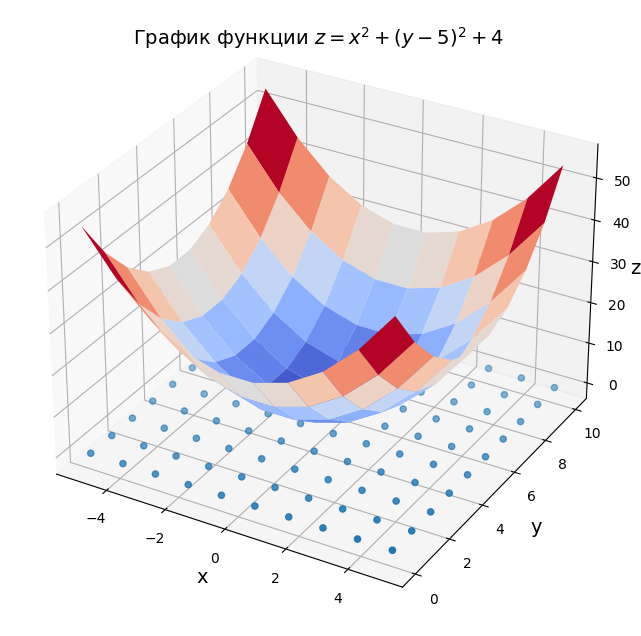

In [13]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')
maszero = np.zeros(y_grid.shape)
ax.scatter(x_grid, y_grid, maszero)

ax.set_title('График функции $z = x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### 4. Постройте 3D-график функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$, используя более мелкую сетку размера $100\times 100$. Саму сетку изображать не нужно. Поменяйте угол обзора графика.
Указание: При помощи ax.view_init(elev=35, azim=20) поменяйте угол обзора графика.

In [14]:
x = np.linspace(-5, 5, 100)
y = np.linspace(0, 10, 100)
x_grid, y_grid = np.meshgrid(x, y)


In [15]:
z_grid = z(x_grid, y_grid)

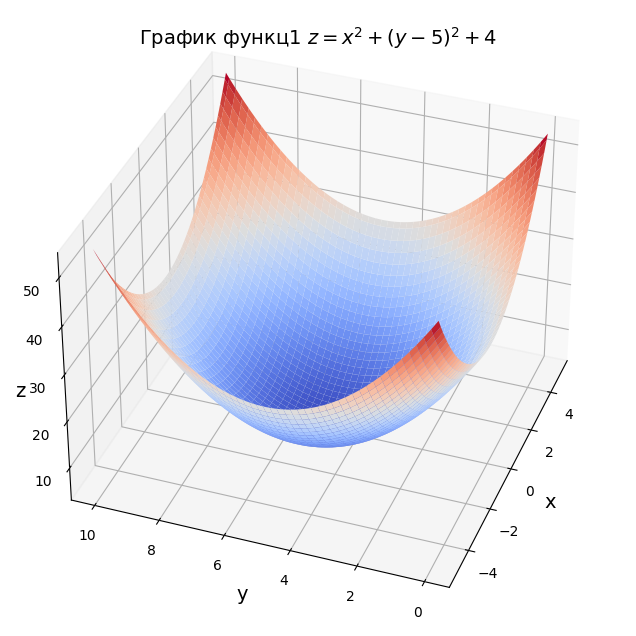

In [16]:
fig = plt.figure(figsize = [10, 8])
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='coolwarm')

ax.view_init(elev=35, azim=200)
ax.set_title('График функц1 $z = x^2 + (y - 5)^2 + 4$', fontsize=14, y = 1.01)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)

plt.show()

### 5. Постройте 2D-график линий уровня функции  $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.
Указание: Используйте метод [contour](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html) библиотеки matplotlib.

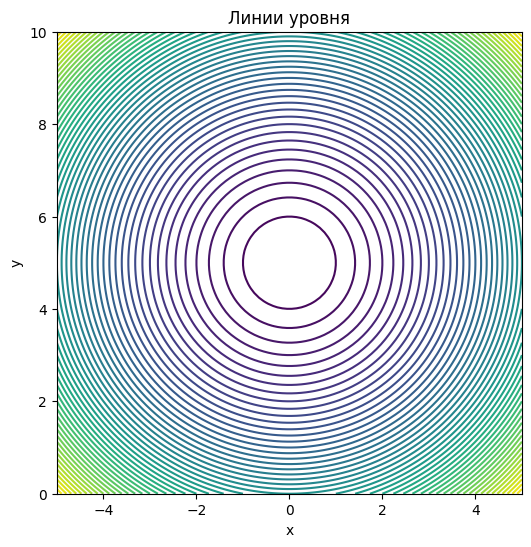

In [17]:
fig = plt.figure(figsize = [6, 6])
plt.contour(x_grid,y_grid,z_grid,levels=50)

plt.title("Линии уровня")
plt.ylabel("y")
plt.xlabel("x")
plt.show()


### 6. Постройте 3D-график линий уровня функции $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$.

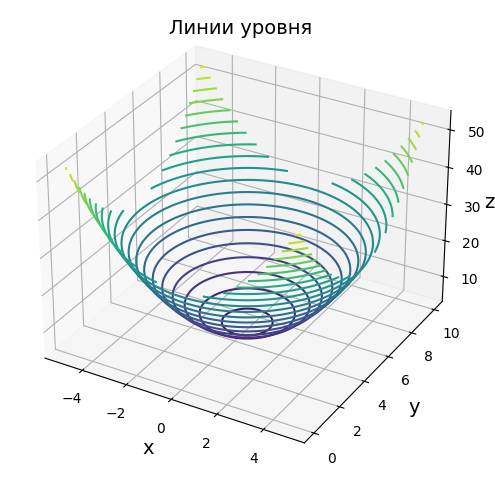

In [18]:
fig = plt.figure(figsize = [6, 6])
ax = fig.add_subplot(projection='3d')

ax.contour(x_grid, y_grid, z_grid, levels=20)
ax.set_title('Линии уровня', fontsize=14, y = 1.01)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
plt.show()

### 7. Постройте на одном 3D-графике функцию $z = x^2 + (y - 5)^2 + 4$ на квадрате $[-5;5]\times[0;10]$ и её линии уровня.
Указание: Для этого при построении поверхности укажите параметр прозрачности alpha=0.5.

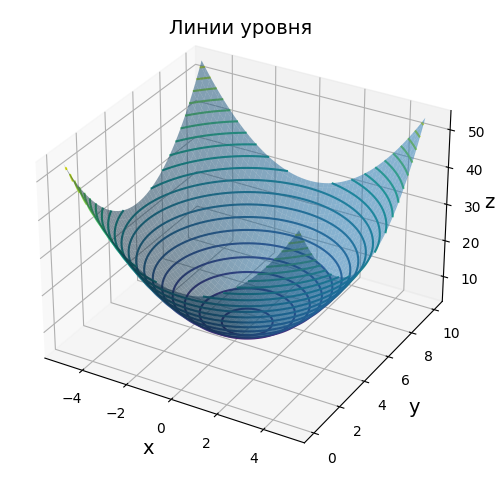

In [19]:
fig = plt.figure(figsize = [6, 6])
ax = fig.add_subplot(projection='3d')

ax.plot_surface(x_grid, y_grid, z_grid, alpha=0.5)
ax.contour(x_grid, y_grid, z_grid, levels=20)
ax.set_title('Линии уровня', fontsize=14, y = 1.01)
ax.set_xlabel('x', fontsize=14)
ax.set_ylabel('y', fontsize=14)
ax.set_zlabel('z', fontsize=14, labelpad = -2)
plt.show()

### 8. Запрограммируйте функцию $f(w) =(w - 3 ) ^ 2$ и её производную. Вычислите значение функции и её производной в случайной точке.

In [16]:
def f(w):
    return (w-3)**2

In [2]:
def derivative_f(w):
    return 2 * (w-3)


In [22]:
f(np.random.random(1))

array([4.87234428])

In [23]:
derivative_f(np.random.random(1))

array([-4.51857143])

### 9. Методом градиентного спуска найдите точку минимума функции одной переменной $f(w) =(w - 3 ) ^ 2$.
Указание: Для этого напишите функцию GD_1d, принимающую на вход производную функции одной переменной, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Пусть эта функция возвращает не только саму точку минимума, а numpy-массив значений x на каждом шаге градиентного спуска.

In [9]:
def GD_1d(derivative_f, w_start, learning_rate=0.1, max_iter=100):
    """
    Реализация градиентного спуска для функций с одним локальным минимумом, совпадающим с глобальным.
    """
    w = w_start
    steps =[]
    for _ in range(max_iter):
        steps.append(w)
        w = w - learning_rate * derivative_f(w)
    assert -1e+06 < w and w < 1e+06, "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert -1e-04 < derivative_f(w) and derivative_f(w) < 1e-04, "Недостаточно шагов градиентного спуска"

    return w, np.array(steps)

In [25]:
w_min, w_steps = GD_1d(derivative_f, w_start=np.random.random(1))
w_min

array([3.])

In [26]:
w_steps[:5]

array([[0.94614433],
       [1.35691546],
       [1.68553237],
       [1.9484259 ],
       [2.15874072]])

### 10. Визуализируйте процесс нахождения точки минимума функции $f(w) =(w - 3 ) ^ 2$ c learning_rate=0.1 и с learning_rate=0.9.
Указание: Для этого напишите функцию plot_GD_1d, принимающую на вход функцию одной переменной и шаги градиентного спуска, которая строит график этой функции и отмечает на нём точками шаги градиентного спуска, соединённые между собой пунктирной линией.

In [10]:
def plot_GD_1d(f, w_steps, learning_rate = 0.9):
    
    w_vals = np.linspace(0,6,100)
    f_vals = f(w_vals)
    
    plt.plot(w_vals, f_vals, label='f(w)')
    f_steps = f(w_steps)
    plt.plot(w_steps, f_steps, 'ro--', label='Шаги', markersize=5)
    
    plt.title(f'Градиентный спуск с learning_rate={learning_rate}')
    plt.xlabel('w')
    plt.ylabel('f(w)')
    plt.show()

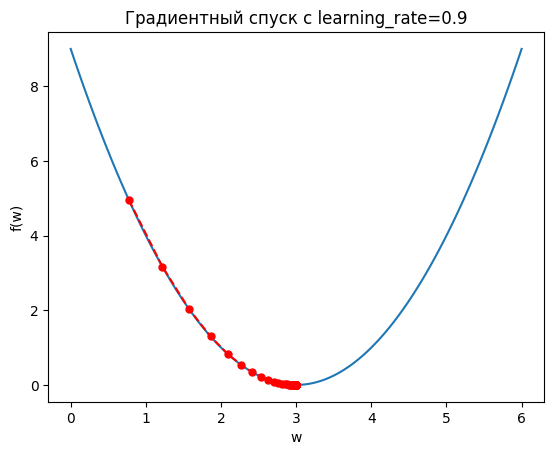

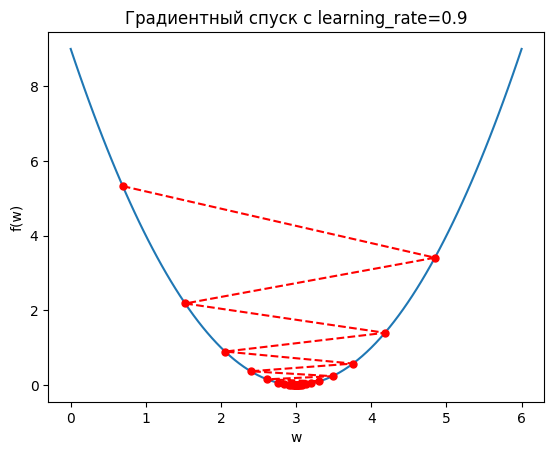

In [17]:
w_min, w_steps1 = GD_1d(derivative_f, w_start=np.random.random(1), learning_rate = 0.1)
w_min, w_steps2 = GD_1d(derivative_f, w_start=np.random.random(1), learning_rate = 0.9)
w_min
plot_GD_1d(f, w_steps1)
plot_GD_1d(f, w_steps2)

### 11. Запрограммируйте функцию $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, а также её градиент. Вычислите значение и градиент этой функции в случайной точке.

In [29]:
def F(w):
    return w[0]**2 + (w[1] - 3)**2 + 1

In [30]:
def gradient_F(w):
    return np.array([(2 * w[0]), 2*(w[1] - 3)])

In [31]:
F(np.random.random(2))


9.068705122597267

In [32]:
gradient_F(np.random.random(2))

array([ 1.12930452, -4.36317551])

### 12. Реализуйте метод градиентного спуска и найдите точку минимума функции двух переменных $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$.
Указание: Для этого модифицируйте функцию GD_1d в функцию GD_2d, принимающую на вход градиент, начальную точуку, скорость обучения, количество шагов и реализующую метод градиентного спуска. Обратите внимание, что стартовая точка теперь состоит из двух значений.

In [33]:
def GD_2d(gradient_F, w_start, learning_rate=0.1, max_iter=100):
    w = np.array(w_start, dtype=float)  
    trajectory = [w.copy()]

    for _ in range(max_iter):
        grad = gradient_F(w)
        w -= learning_rate * grad  
        trajectory.append(w.copy())
        
    assert (-1e+06 < w).all() and (w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert (-1e-04 < gradient_F(w)).all() and (gradient_F(w) < 1e-04).all(), "Недостаточно шагов градиентного спуска"    

    return w, np.array(trajectory)




In [34]:
w_start = [0.0, 0.0] 
w_min, trajectory = GD_2d(gradient_F, w_start, learning_rate=0.1, max_iter=100)
print(f"Найденная точка минимума: {w_min}")


Найденная точка минимума: [0. 3.]


### 13. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.2.
Указание: Для этого напишите функцию plot_GD_2d, которая принимает на вход функцию двух переменных и шаги градиентного спуска, а строит график этой функции с линиями уровня и отмечает на нём точки шагов градиентного спуска, соединённые между собой ломаной линией. Для наглядности в функции plot_GD_2d разверните пространственный график на угол с azim=0.

In [35]:
def plot_GD_2d(F, trajectory, learning_rate):
    w1_vals = np.linspace(-5, 5, 100)
    w2_vals = np.linspace(-5, 5, 100)
    W1, W2 = np.meshgrid(w1_vals, w2_vals)
    F_vals = F([W1, W2])

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(W1, W2, F_vals, cmap='viridis', alpha=0.6)

    trajectory = np.array(trajectory)
    ax.plot(trajectory[:, 0], trajectory[:, 1], F(trajectory.T), 'ro-', label=f'Trajectory (lr={learning_rate})')
    
    ax.view_init(elev=0, azim=0)
    ax.set_xlabel('w1')
    ax.set_ylabel('w2')
    ax.set_zlabel('F(w1, w2)', labelpad = -2)
    ax.legend()
    plt.title(f'Градиентный спуск с learning_rate={learning_rate}')
    plt.show()


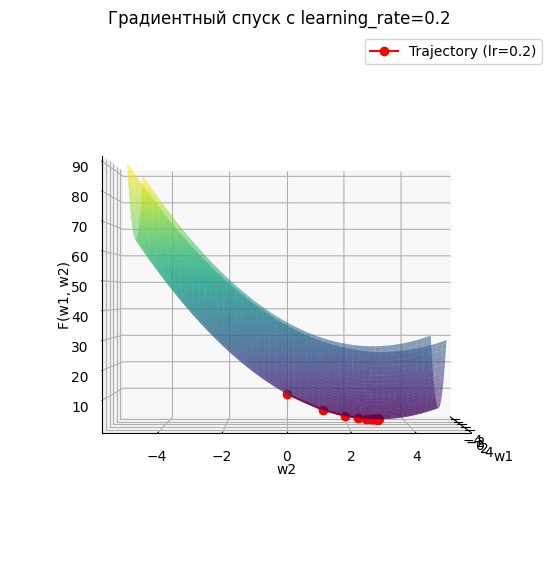

In [36]:
w_min, trajectory = GD_2d(gradient_F, w_start=[0.0, 0.0], learning_rate=0.2, max_iter=100)
plot_GD_2d(F, trajectory, learning_rate=0.2)

### 14. Визуализируйте процесс нахождения точки минимума функции $F(w_1,w_2) ={w_1}^2 + ({w_2} - 3)^2 + 1$, когда градиентный спуск реализуется с learning_rate = 0.8.

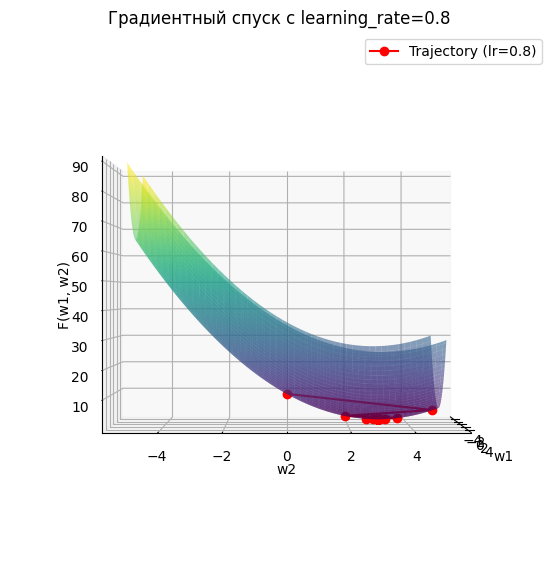

In [37]:
w_min, trajectory = GD_2d(gradient_F, w_start=[0.0, 0.0], learning_rate=0.8, max_iter=100)
plot_GD_2d(F, trajectory, learning_rate=0.8)

### 15. Методом градиентного спуска найдите минимум функции четырёх переменных  $F(w_1,w_2,w_3,w_4) ={w_1}^2 + ({w_2}+5*w_3)^2 + (2*w_4 - 3)^2 + 6$.
Указание: Для этого модифицируйте функцию GD_2d в функцию GD_nd применимую для функций n-переменных. Выводить нужно только точку минимума функции, а значения на каждом шаге - нет, т.к. визуализация в данном случае невозможна. Подберите необходимые значения learning_rate = 0.001 и max_iter=10000.

In [38]:
def F(w1,w2,w3,w4):
    return w1**2 + (w2+5*w3)**2 + (2*w4-3)**2 + 6

In [39]:
def gradient_F(w1,w2,w3,w4):
    return np.array([2*w1, 2*(w2+5*w3), 10*(w2+5*w3), 4*(2*w4-3)])

In [40]:
def GD_nd(gradient_F, w_start, learning_rate=0.001, max_iter=10000):
    w = np.array(w_start, dtype=float)  
    
    for _ in range(max_iter):
        grad = gradient_F(*w)
        w -= learning_rate * grad  
        
        
    assert (-1e+06 < w).all() and (w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert (-1e-04 < gradient_F(*w)).all() and (gradient_F(*w) < 1e-04).all(), "Недостаточно шагов градиентного спуска"    

    return w




In [41]:
w_min = GD_nd(gradient_F, np.zeros(4))
w_min

array([0. , 0. , 0. , 1.5])

### 16. Найдите минимум функции c параметрами a и b $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. методом градиентного спуска. В качестве значений параметров возьмите $a=5, b =-7$ и $a=-2, b =3$.

Указание: Добавьте в функцию GD_nd параметры a и b, назовите, полученную функцию GD.

In [42]:
def gradient_F(w, a, b):
    return np.array([2*w[0]*a, 2*(w[1]+5*w[2]+b), 10*(w[1]+5*w[2] + b), 4*(2*w[3]-3)])

In [43]:
def GD(gradient_F, w_start, a=1, b=1, learning_rate=0.001, max_iter=1000):
    w = np.array(w_start, dtype=float)  
    
    for _ in range(max_iter):
        grad = gradient_F(w, a, b)
        w -= learning_rate * grad  
        
        
    assert (-1e+06 < w).all() and (w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
    assert (-1e-04 < gradient_F(w, a, b)).all() and (gradient_F(w, a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"    

    return w


In [44]:
w_min = GD(gradient_F, np.zeros(4), learning_rate=0.005, max_iter=1000, a=5, b=-7)
w_min

array([0.        , 0.26923077, 1.34615385, 1.5       ])

In [45]:
w_min = GD(gradient_F, np.zeros(4), learning_rate=0.005, max_iter=1000, a=-2, b=3)
w_min

array([ 0.        , -0.11538462, -0.57692308,  1.5       ])

### 17. Создайте класс GradientDiscent, реализующий метод градиентного спуска для функции $F(w_1, w_2, w_3, w_4, a, b) =a*{w_1}^2 + ({w_2}+5*w_3 + b)^2 + (2*w_4 - 3)^2 + 6$. Найдите минимумы при различных a и b.
Указание: Укажите в конструкторе класса атрибуты: w и количество итераций. Добавьте в класс методы gradient_F и GD. Создайте метод fit, который вызывает функцию GD.

In [46]:
def gradient_F(w, a, b):
        return np.array([2*w[0]*a, 2*(w[1]+5*w[2]+b), 10*(w[1]+5*w[2] + b), 4*(2*w[3]-3)])
    
gradient_F(np.zeros(4), 5, -7)

array([  0., -14., -70., -12.])

In [47]:
class GradientDiscent():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter
    
    def gradient_F(self, w, a, b):
        return np.array([2*a*w[0], 2*(w[1] + 5*w[2] + b), 10*(w[1] + 5*w[2] + b), 4*(2*w[3] -3)])    
        
    def GD(self, a, b, w_start, learning_rate=0.005):
        self.w = w_start

        for _ in range(self.max_iter_):
            self.w = self.w - learning_rate *self.gradient_F(self.w, a, b)
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(self.w, a, b)).all() and (self.gradient_F(self.w, a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"
                
    def fit(self, a, b, w_start=np.zeros(4)):
        self.GD(a, b, w_start)

In [48]:
gd = GradientDiscent(1000)

a = 5
b = -7

gd.fit(a, b)

In [49]:
gd.w

array([0.        , 0.26923077, 1.34615385, 1.5       ])

### 18. Модифицируйте класс GradientDiscent в класс GradientDiscent_err, таким образом, чтобы алгоритм градиентного спуcка останавливался, когда искомое значение точки минимума перестаёт существенно меняться. Добавьте в класс атрибут, выводящий количество сделанных шагов.
Указание: Для этого в метод GD добавьте вычисление средней абсолютной ошибки изменения значений между предыдущим и последующим шагом. Если ошибка станет меньше некоторой заранее заданной очень маленькой величины (error_reduction=0.0000001) - выходите из цикла.

In [50]:
class GradientDiscent():
    def __init__(self, max_iter):
        self.w = None
        self.max_iter_ = max_iter
        self.steps = 0

    
    def gradient_F(self, w, a, b):
        return np.array([2*a*w[0], 2*(w[1] + 5*w[2] + b), 10*(w[1] + 5*w[2] + b), 4*(2*w[3] -3)])    
        
    def GD(self, a, b, w_start, learning_rate=0.005, error_reduction=0.0000001):
        self.w = w_start
        error = 1
        
        for i in range(self.max_iter_):
            self.steps = i
            prev = self.w.copy()
            self.w = self.w - learning_rate *self.gradient_F(self.w, a, b)
            error = abs(self.w - prev).sum() / len(prev)
            if error < error_reduction:
                break
            
        assert (-1e+06 < self.w).all() and (self.w < 1e+06).all(), "Расходимость: слишком большой learning_rate, либо неудачно выбрана начальная точка, либо минимум не достигается"
        assert (-1e-04 < self.gradient_F(self.w, a, b)).all() and (self.gradient_F(self.w, a, b) < 1e-04).all(), "Недостаточно шагов градиентного спуска"
                
    def fit(self, a, b):
        w_start = np.zeros(4)
        self.GD(a, b, w_start)

In [51]:
gd = GradientDiscent(1000)

a = 5
b = -7

gd.fit(a, b)


In [52]:
gd.w

array([0.        , 0.26923077, 1.34615385, 1.49999042])

In [53]:
gd.steps

292